In [68]:
import os
 
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt
 
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import RMSprop
 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [69]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [70]:
import io
df = pd.read_excel(io.BytesIO(uploaded['enflasyonaylık.xlsx']), header=0, parse_dates=['Date'], index_col="Date", squeeze=True)


In [71]:
df

Date
2005-01-01    0.55
2005-02-01    0.02
2005-03-01    0.26
2005-04-01    0.71
2005-05-01    0.92
              ... 
2018-10-01    2.67
2018-11-01   -1.44
2018-12-01   -0.40
2019-01-01    1.06
2019-02-01    0.16
Name: enflasyon, Length: 170, dtype: float64

In [72]:
series = pd.DataFrame(df)
df.index = pd.to_datetime(df.index)

In [113]:
train = series.loc[series.index < '2012-01-01']
test = series.loc[series.index >= '2012-01-01']

In [114]:
sc = MinMaxScaler(feature_range=(0,1))
train_scaled = sc.fit_transform(train)

In [115]:
n_lag = 12
X_train = []
y_train = []
for i in range(n_lag, len(train)):
    X_train.append(train_scaled[i-n_lag:i, 0])
    y_train.append(train_scaled[i, 0])
 
X_train, y_train = np.array(X_train), np.array(y_train)
 
# Reshape train set
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [116]:
# Initiate model
regressor = Sequential()
 
# Add one LSTM layer
regressor.add(LSTM(units=n_lag, input_shape=(X_train.shape[1], 1)))
 
# Add an output layer
regressor.add(Dense(units=1))
 
# Compile the model
opt = RMSprop(lr=0.0001)
regressor.compile(optimizer = opt, loss = 'mae')
 
# Fit LSTM to the training set with a split for validation
history = regressor.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32)

Epoch 1/200
2/2 [==============================] - 1s 250ms/step - loss: 0.5489 - val_loss: 0.5536
Epoch 2/200
2/2 [==============================] - 0s 15ms/step - loss: 0.5434 - val_loss: 0.5496
Epoch 3/200
2/2 [==============================] - 0s 16ms/step - loss: 0.5395 - val_loss: 0.5463
Epoch 4/200
2/2 [==============================] - 0s 19ms/step - loss: 0.5362 - val_loss: 0.5433
Epoch 5/200
2/2 [==============================] - 0s 15ms/step - loss: 0.5332 - val_loss: 0.5405
Epoch 6/200
2/2 [==============================] - 0s 15ms/step - loss: 0.5304 - val_loss: 0.5379
Epoch 7/200
2/2 [==============================] - 0s 19ms/step - loss: 0.5277 - val_loss: 0.5353
Epoch 8/200
2/2 [==============================] - 0s 17ms/step - loss: 0.5251 - val_loss: 0.5328
Epoch 9/200
2/2 [==============================] - 0s 16ms/step - loss: 0.5226 - val_loss: 0.5304
Epoch 10/200
2/2 [==============================] - 0s 14ms/step - loss: 0.5201 - val_loss: 0.5280
Epoch 11/200
2/2 [

In [117]:
# Prepare test set
inputs = series[len(series) - len(test) - n_lag:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(n_lag, n_lag+len(test)):
    X_test.append(inputs[i-n_lag:i, 0])
     
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
 
# Forecast
predict_scaled = regressor.predict(X_test)
predict = sc.inverse_transform(predict_scaled)
 
predict = pd.DataFrame(predict)
predict.columns = ['Aylık Enflasyon']
predict.index = test.index

In [118]:
predict

,Aylık Enflasyon
Date,
2012-01-01,0.632660
2012-02-01,0.618372
2012-03-01,0.594636
2012-04-01,0.560783
2012-05-01,0.617404
...,...
2018-10-01,1.018290
2018-11-01,1.090948
2018-12-01,0.816936


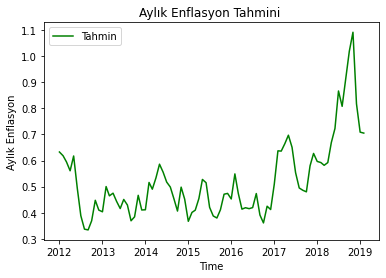

In [119]:
plt.plot(predict, color = 'green', label = 'Tahmin')
plt.title('Aylık Enflasyon Tahmini ')
plt.xlabel('Time')
plt.ylabel('Aylık Enflasyon')
plt.legend()

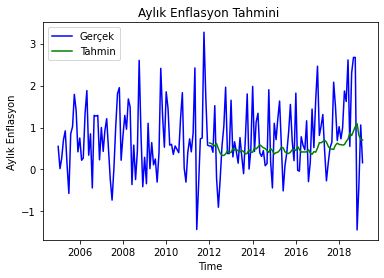

In [120]:
plt.plot(df, color = 'blue', label = 'Gerçek')
plt.plot(predict, color = 'green', label = 'Tahmin')
plt.title('Aylık Enflasyon Tahmini ')
plt.xlabel('Time')
plt.ylabel('Aylık Enflasyon')
plt.legend()

In [32]:
gerçek= df.iloc[:].values

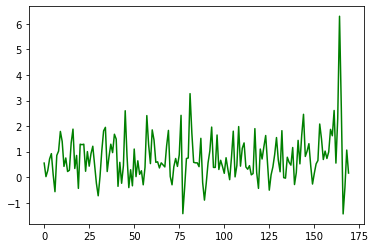

In [33]:

plt.plot(gerçek, color = 'green', label = 'Tahmin')